<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


Импортируем библиотеку и откроем файл

In [2]:
try:
    data = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

Посмотрим общую информацию о данных файла

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим первые 10 строк данных

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Построим гистограммы, для этого посмотрим какие есть столбцы и какие данные

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Построим графики для столбцов 

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

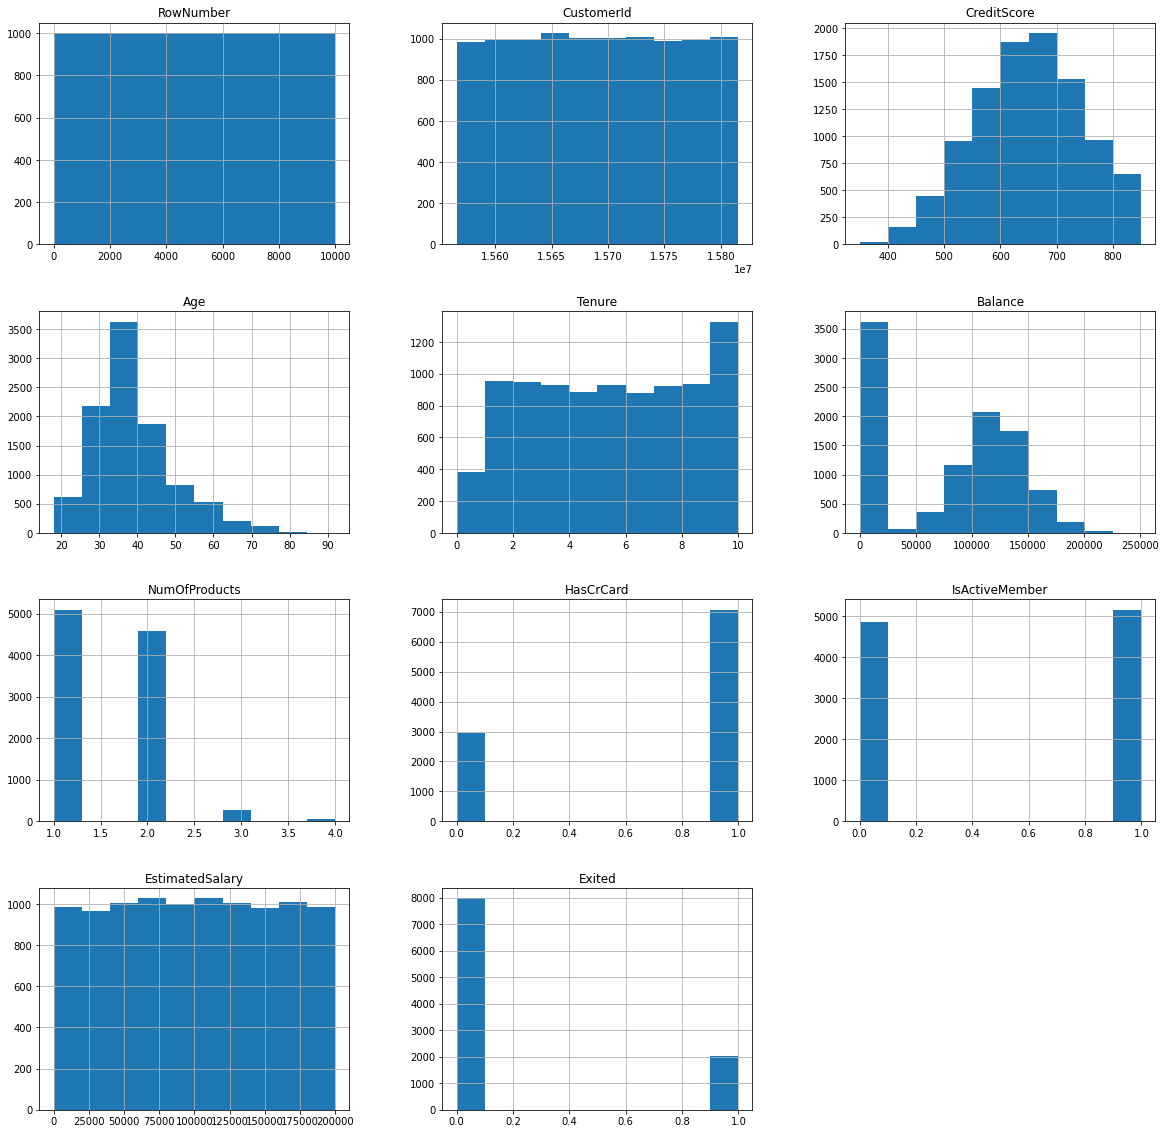

In [6]:
data.hist(figsize=(20,20))

Посмотрим пропуски

In [7]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В процентах (также можно понять возможность удаления)

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.000000
Balance,0.000000
NumOfProducts,0.000000


Посмотрим, что содержится в целевом признаке в строках с пропуском в столбце с Tenure

In [9]:
data[data['Tenure'].isna()]['Exited'].value_counts()

0    726
1    183
Name: Exited, dtype: int64

Посмотрим есть ли какая-то взаимосвязь между данными в Tenure и данными в других столбцах

In [10]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Связи никакой не прослеживается, но не хочется удалять значения целевого признака 1
Предлагаю заполнить пропуски медианой

In [11]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

Проверяем пропуски

In [12]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Исправим названия столбцов

In [13]:
data.columns = data.columns.str.lower()

Проверяем

In [14]:
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

Поменяем также на snake_case

In [15]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

Проверяем

In [16]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Проверим есть ли повторяющиеся данные

In [17]:
data.duplicated().sum()

0

Есть колонки с номером ряда, номер пользователя, фамилией, они не влияют на уход, уберем их перед дальнейшим анализом

In [18]:
data_for_analysis = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

Проверим

In [19]:
data_for_analysis.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Для анализа надо преобразовать категориальные данные с помощью OHE

In [20]:
data_for_analysis = pd.get_dummies(data_for_analysis, drop_first=True)

Проверяем

In [21]:
data_for_analysis.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Приведем в соотвествие новые столбцы

In [22]:
data_for_analysis.columns = data_for_analysis.columns.str.lower()

Проверим

In [23]:
data_for_analysis.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_germany', 'geography_spain', 'gender_male'],
      dtype='object')

Вывод: загрузили данные, посмотрели информацию о данных, посмотрели графически на числовые данные. Были обнаружены пропуски в столбце с Tenure, учитывая, что там часть данных содержала 1 в целевом признаке, было принято решение не удалять данные и  заполнить пропуски медианой, т.к. не было обнаружено связи этого столбца с другими столбцами, чтобы понять, чем еще можно заполнить. Названия столбцов были приведены в соотвествие с snake_case. Из данных для анализа были удалены столбцы, не влияющие на отток, данные сохранены в новой переменной. Было проведено кодирование OHE для преобразования категориальных данных для того, чтобы мы могли построить в дальнейшем модели и использовать эти данные.

In [24]:
!pip3 install pandas-profiling==2.11
from pandas_profiling import ProfileReport


profile = ProfileReport(data_for_analysis,
                        title='Pandas Profiling Report')

profile.to_widgets()

     |████████████████████████████████| 243 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 37.0 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 47.1 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 2.0 MB 42.9 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 51.1 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=dbe709b3342217ce711cd381fa90440a4eb9f8b672fc08bf1ee3a32eb38b69ea
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Исследование задачи

Разобьем данные на выборки, сначала отделим тестовую выборку, 20% для тестовой выборки, затем разделим на обучающую и валидационную выборку, 25% для валидационной выборки, нужно обозначить stratify, т.к. соотношение 1 и 0 неравномерное в целевом признак 

In [25]:
features = data_for_analysis.drop(['exited'], axis=1)
target = data_for_analysis['exited']

features_v_l, features_test, target_v_l, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify=target) 

features_train, features_valid, target_train, target_valid = train_test_split(
    features_v_l, target_v_l, test_size=0.25, random_state=12345, stratify=target_v_l)


Проверим размер выборок

In [26]:
print('Тестовая выборка:', features_test.shape, target_test.shape,
    'Обучающая выборка:', features_train.shape, target_train.shape,
    'Валидационная выборка:', features_valid.shape, target_valid.shape
     )

Тестовая выборка: (2000, 11) (2000,) Обучающая выборка: (6000, 11) (6000,) Валидационная выборка: (2000, 11) (2000,)


Посмотрим целевой признак

In [27]:
target.value_counts()


0    7963
1    2037
Name: exited, dtype: int64

Вывод: данных со значением, когда клиент уйдет меньше, это может сказываться на обучении и на том, что модель, предсказывающая, что клиент не уйдет может по качеству быть не хуже обученной модели

Стандартизируем данные, выделим данные числовые данные с большим разбросом 
Ранее методом describe смотрели какие есть данные в столбцах

In [28]:
numeric = ['credit_score', 'age', 'estimated_salary', 'balance']
pd.options.mode.chained_assignment = None
scaler = StandardScaler() 
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.head())

      credit_score       age  tenure   balance  num_of_products  has_cr_card  \
5536     -0.143332  0.577533     5.0 -1.220573                2            1   
8530      1.632702 -0.564119     2.0  0.435807                1            1   
1762      1.116413 -0.468981     1.0  1.245822                1            1   
9090      1.643028  0.006707     5.0 -1.220573                1            1   
8777     -0.484083 -1.420358     1.0  1.421989                2            1   

      is_active_member  estimated_salary  geography_germany  geography_spain  \
5536                 1          1.029613                  0                1   
8530                 0          0.237986                  0                0   
1762                 1         -0.686104                  0                0   
9090                 0         -0.391097                  0                0   
8777                 0         -1.361559                  0                1   

      gender_male  
5536            1 

Построим дерево решений

In [29]:
model = DecisionTreeClassifier(random_state=12345)

model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

print("Accuracy модели на валидационной выборке:", accuracy_score(target_valid, predictions_valid))
print(f'Полнота: {recall_score(target_valid, predictions_valid)}.')
print(f'Точность: {precision_score(target_valid, predictions_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')
print(f'AUC-ROC: {auc_roc}.')

Accuracy модели на валидационной выборке: 0.7885
Полнота: 0.515970515970516.
Точность: 0.481651376146789.
F1-мера: 0.4982206405693951.
AUC-ROC: 0.6870499158634751.


Построим случайный лес, возьмем глубину и деревья по 10

In [30]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=12345) 
model.fit(features_train, target_train)        
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

print(f'Accuracy: {accuracy_score(target_valid, predicted_valid)}.')
print(f'Полнота: {recall_score(target_valid, predicted_valid)}.')
print(f'Точность: {precision_score(target_valid, predicted_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predicted_valid)}.')
print(f'AUC-ROC: {auc_roc}.')

Accuracy: 0.8575.
Полнота: 0.4176904176904177.
Точность: 0.7798165137614679.
F1-мера: 0.5439999999999999.
AUC-ROC: 0.850495333546181.


Построим логистическую регрессию

In [31]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'Accuracy: {accuracy_score(target_valid, predictions_valid)}.')
print(f'Полнота: {recall_score(target_valid, predictions_valid)}.')
print(f'Точность: {precision_score(target_valid, predictions_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')
print(f'AUC-ROC: {auc_roc}.')

Accuracy: 0.8185.
Полнота: 0.2113022113022113.
Точность: 0.671875.
F1-мера: 0.3214953271028037.
AUC-ROC: 0.787568770619618.


Константная модель

In [32]:
target_pred_constant = pd.Series(1, index=target_train.index)
print(f'Accuracy: {accuracy_score(target_train, target_pred_constant)}.')
print(f'Полнота: {recall_score(target_train, target_pred_constant)}.')
print(f'Точность: {precision_score(target_train, target_pred_constant)}.')
print(f'F1-мера: {f1_score(target_train, target_pred_constant)}.')

Accuracy: 0.20383333333333334.
Полнота: 1.0.
Точность: 0.20383333333333334.
F1-мера: 0.33864045410494253.


Вывод: построили модели, но не учитывали дисбаланс классов и разные показатели в столбцах с данными, с этим поработаем в следующем разделе и посмотрим, что будет с моделями после этого. 

## Борьба с дисбалансом

Построим случайный лес, возьмем те же показатели

In [35]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=12345) 
model.fit(features_train, target_train)        
predicted_valid = model.predict(features_valid)
print(f'Accuracy: {accuracy_score(target_valid, predicted_valid)}.')
print(f'Полнота: {recall_score(target_valid, predicted_valid)}.')
print(f'Точность: {precision_score(target_valid, predicted_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predicted_valid)}.')

Accuracy: 0.8575.
Полнота: 0.4176904176904177.
Точность: 0.7798165137614679.
F1-мера: 0.5439999999999999.


Построим логистическую регрессию

In [36]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

print(f'Accuracy: {accuracy_score(target_valid, predictions_valid)}.')
print(f'Полнота: {recall_score(target_valid, predictions_valid)}.')
print(f'Точность: {precision_score(target_valid, predictions_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')

Accuracy: 0.8185.
Полнота: 0.2113022113022113.
Точность: 0.671875.
F1-мера: 0.3214953271028037.


Дерево решений

In [37]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("Accuracy модели на валидационной выборке:", accuracy_score(target_valid, predictions_valid))
print(f'Полнота: {recall_score(target_valid, predictions_valid)}.')
print(f'Точность: {precision_score(target_valid, predictions_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')

Accuracy модели на валидационной выборке: 0.7885
Полнота: 0.515970515970516.
Точность: 0.481651376146789.
F1-мера: 0.4982206405693951.


Вывод: F1 далека от 1, нужно дорабатывать модели

Придадим объектам редкого класса больший вес c помощью гиперпараметра class_weight

In [38]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=12345, class_weight='balanced') 
model.fit(features_train, target_train)        
predicted_valid = model.predict(features_valid)
print(f'Accuracy: {accuracy_score(target_valid, predicted_valid)}.')
print(f'Полнота: {recall_score(target_valid, predicted_valid)}.')
print(f'Точность: {precision_score(target_valid, predicted_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predicted_valid)}.')

Accuracy: 0.835.
Полнота: 0.6117936117936118.
Точность: 0.5914489311163895.
F1-мера: 0.6014492753623188.


Посмотрим будет ли разница на логистической регрессии

In [39]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced') 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

print("Accuracy модели на валидационной выборке:", accuracy_score(target_valid, predictions_valid))
print(f'Полнота: {recall_score(target_valid, predictions_valid)}.')
print(f'Точность: {precision_score(target_valid, predictions_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')

Accuracy модели на валидационной выборке: 0.719
Полнота: 0.7223587223587223.
Точность: 0.39569313593539707.
F1-мера: 0.5113043478260869.


Дерево решений

In [40]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("Accuracy модели на валидационной выборке:", accuracy_score(target_valid, predictions_valid))
print(f'Полнота: {recall_score(target_valid, predictions_valid)}.')
print(f'Точность: {precision_score(target_valid, predictions_valid)}.')
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')

Accuracy модели на валидационной выборке: 0.799
Полнота: 0.5012285012285013.
Точность: 0.5062034739454094.
F1-мера: 0.5037037037037037.


Вывод: class_weight параметр со значением balanced улучшил показатели моделей

Увеличение выборки, class_weight тоже сохраним

In [41]:
target_train.value_counts()

0    4777
1    1223
Name: exited, dtype: int64

In [42]:
disbalance = 4777/1223
disbalance

3.9059689288634507

In [43]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5113043478260869


In [44]:
target_upsampled.value_counts()

1    4892
0    4777
Name: exited, dtype: int64

Случайный лес

In [45]:
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=10, class_weight='balanced') 
model.fit(features_upsampled, target_upsampled)    
predicted_valid = model.predict(features_valid) 

print(f'F1-мера: {f1_score(target_valid, predicted_valid)}.')

F1-мера: 0.5976267529665588.


Дерево решений

In [46]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')

F1-мера: 0.5072815533980582.


Уменьшение выборки

In [47]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid) # < напишите код здесь >

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5100436681222706


In [48]:
target_downsampled.value_counts()

1    1223
0    1194
Name: exited, dtype: int64

Случайный лес

In [49]:
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=10, class_weight='balanced') 
model.fit(features_downsampled, target_downsampled)    
predicted_valid = model.predict(features_valid) 

print(f'F1-мера: {f1_score(target_valid, predicted_valid)}.')

F1-мера: 0.5906542056074766.


Дерево решений

In [50]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
print(f'F1-мера: {f1_score(target_valid, predictions_valid)}.')

F1-мера: 0.488471391972673.


Вывод: попробовали разные вариации, лучшее сочетание это случайный лес плюс balanced в class_weight и увеличенная выборка 1 в целевом признаке

Изучим AUC-ROC

Лучшая F1-мера 0.5976267529665588, лучший precision 0.5326923076923077, лучший recall 0.6805896805896806.
AUC-ROC: 0.8469586689925672.


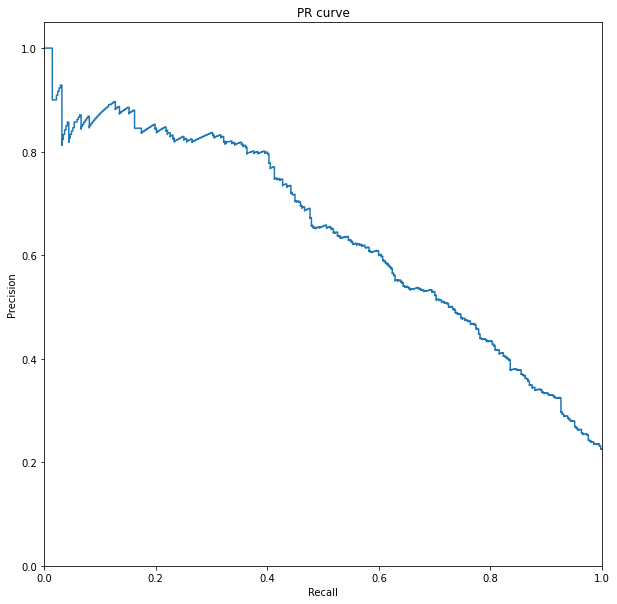

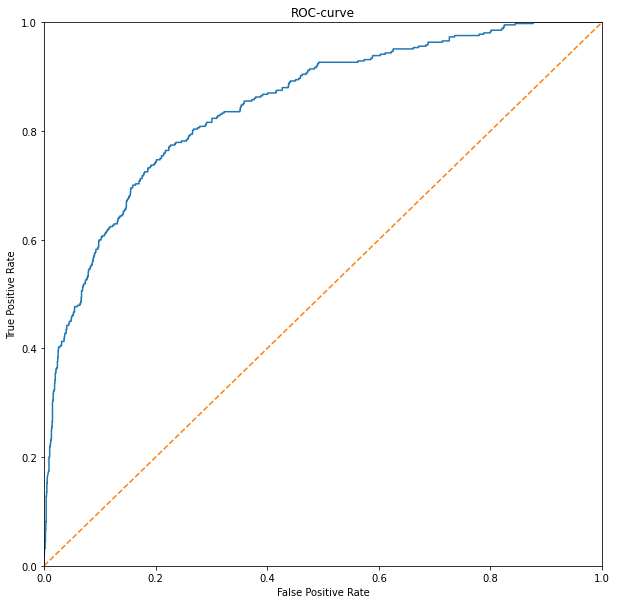

In [51]:
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=10, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


best_f1 = 0
for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_precision = precision
        best_recall = recall
    
print(f'Лучшая F1-мера {best_f1}, лучший precision {best_precision}, лучший recall {best_recall}.')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
print(f'AUC-ROC: {auc_roc}.')

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_one_valid)    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

Лучшая F1-мера 0.5976267529665588, лучший precision 0.5326923076923077, лучший recall 0.6805896805896806.
AUC-ROC: 0.7918072155360292.


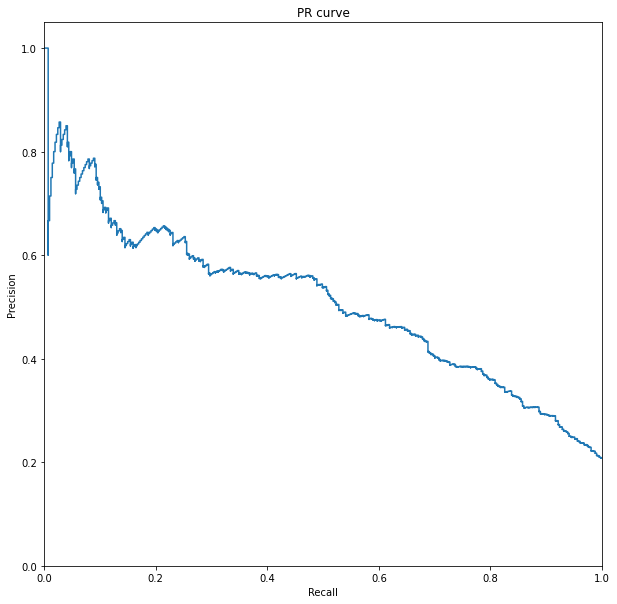

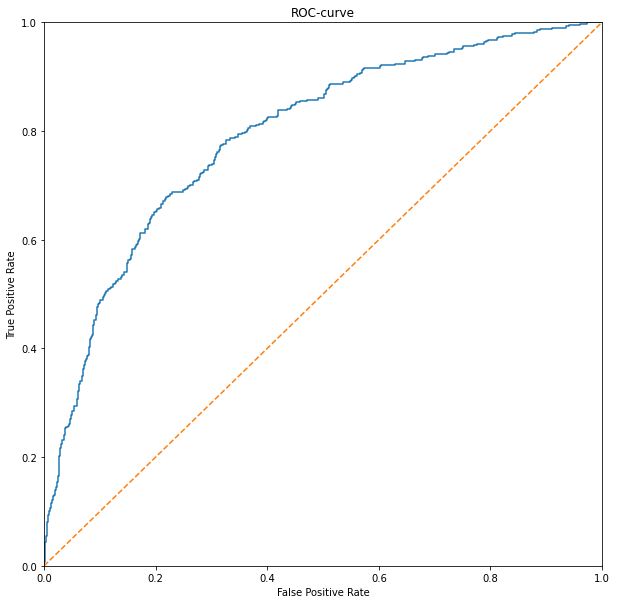

In [52]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_precision = precision
        best_recall = recall
    
print(f'Лучшая F1-мера {best_f1}, лучший precision {best_precision}, лучший recall {best_recall}.')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
print(f'AUC-ROC: {auc_roc}.')

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_one_valid)    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

Дерево решений

Лучшая F1-мера 0.5072815533980582, лучший precision 0.5011990407673861, лучший recall 0.5135135135135135.
AUC-ROC: 0.6914711321490983.


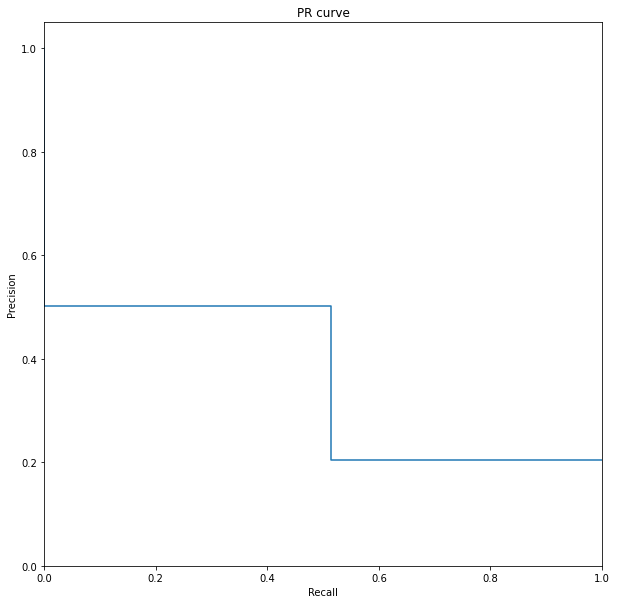

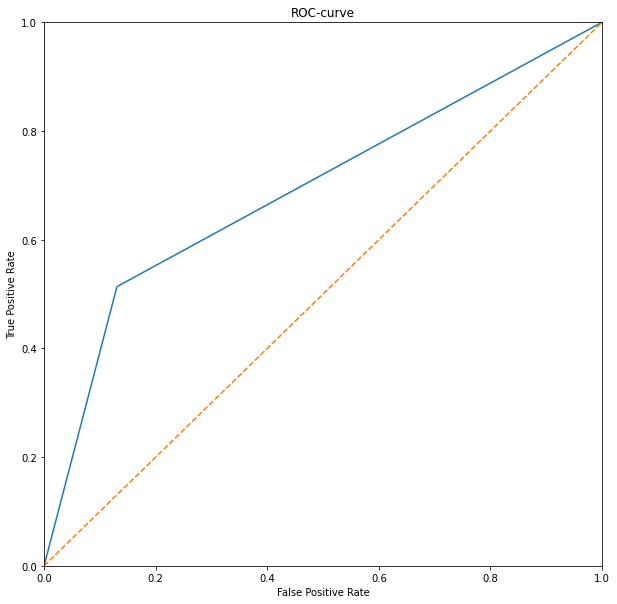

In [53]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


best_f1 = 0
for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_precision = precision
        best_recall = recall
    
print(f'Лучшая F1-мера {best_f1}, лучший precision {best_precision}, лучший recall {best_recall}.')
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
print(f'AUC-ROC: {auc_roc}.')

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_one_valid)    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

Вывод: с разными порогами посмотрели и выбрали лучшее по показателям F1-меры, графически изобразили PR-кривую и ROC-кривую. По ROC-кривой видно, что наши модели лучше случайной модели. Лучшие показатели у случайного леса.

Вывод по разделу: Попробовали разные подходы, увеличить выборку с нужным целевым значением, уменьшить отрицaтeльные признаки, попробовали гиперпараметр class_weight, стандартизировали данные. Из всего лучший результат показало увеличение выборки на случайном лесе. В тестировании будет использовать эту модель.

## Тестирование модели

Проведем тестирование модели случайный лес с большей F1-мерой

F1-мера: 0.5988950276243094.
AUC-ROC: 0.8518919535868689.


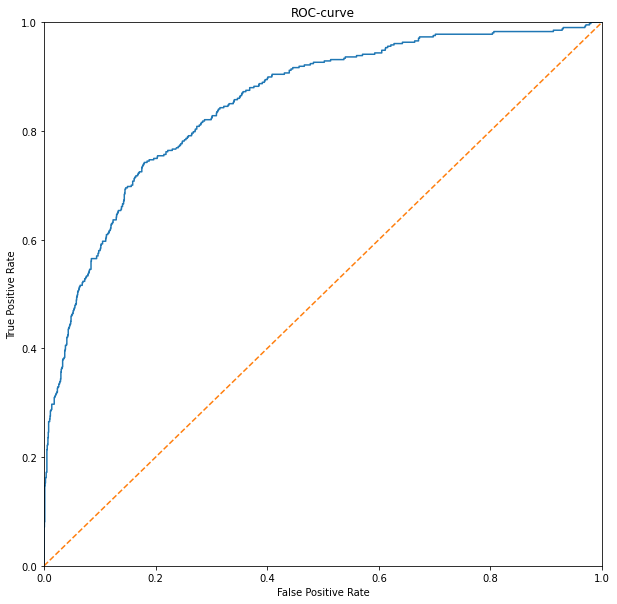

In [54]:
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=10, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(f'F1-мера: {f1_score(target_test, predicted_test)}.')
print(f'AUC-ROC: {auc_roc}.')

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

Вывод: удалось достигнуть F1-меры больше 0.59 на тестовой выборке

Общий вывод: загрузили данные, рассмотрели их, провели предобработку данных: поработали с названиями столбцов, с пропусками, посмотрели какие есть данные, есть ли дубликаты, с помощью OHE обработали столбцы с категориальными данными, убрали столбцы ненужные для анализа, разделили выборки на обучающую, валидационную и тестовую, построили модели не учитывая дисбаланс данных, стандартизировали данные, построили модели, увеличили и уменьшали выборки в целевом признаке, поработали с гиперпараметром class_weight, посмотрели на PR-кривую и ROC-кривую. Самую лучшую модель протестировали на тестовой выборке.